### Filter Method
Filter Method 는 Machine Learning Algorithm과 독립적으로 Feature Selection을 수행하는 방법이다.  
Filter Method의 가장 큰 장점중의 하나라고 할 수 있다. Filter Method로 선택된 Feature들은 모든 Machine Learning Algorithm에 사용할 수 있다.  
또한 Filter Method는 매우 빠르다는 장점 또한 가지고 있다. 그렇기 때문에 Feature Selection의 파이프라인 중에서 첫번째 단계에서 수행된다. 

Filter Method는 크게 **Univariate Filter Method** 와 **Multivariate Filter Method** 로 구분할 수 있다. 

##### Univariate Filter Method(단변량)
*Univariate Filter Method* 는 특정 기준에 따라 각각의 Feature에 순위를 정한수, 상위 N개의 Feature를 선택하는 방법이다.  
Fisher Score, Mutual information and Variance 등의 기준을 사용할 수 있다.   
하지만, Feature간의 관계를 고려하지 않기 때문에, 중복되는 성질을 가진 Feature를 선택할 수 있다.  
그렇기 때문에 상수 및 준 상수 특성을 제거하는데 이상적이라고 할 수 있는 방법이다.


##### Multivariate Filter Method
*Multivariate Filter Method*는 Feature 간의 상호 관계를 고려하므로 데이터에서 중복 및 상관된 성질을 가진 Feature를 제거할 수 있다.  

사용할 데이터는 Kaggle에서 제공하는 [Santandar Customer Satisfation](https://www.kaggle.com/c/santander-customer-satisfaction/data)의 train.csv를 사용한다.  

[참고링크](https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection)


In [1]:
####  Importing Requied Libraries and Dataset
import pandas
import numpy
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

santandar_data = pandas.read_csv("c:\\Users\\WAI\\OneDrive\\03.WORKSPACE\\00.DATA\\03.FeatureSelection\\02.FilterMethod\\train.csv")
print(santandar_data.shape)

# Split Data Into Train and Test Sets
train_x, test_x, train_y, test_y = train_test_split(santandar_data.drop(labels=["TARGET"],axis=1),
                                                    santandar_data["TARGET"], test_size=0.3, random_state=41)

print("TRAIN SHAPE : {}\nTEST SHAPE : {}".format(train_x.shape, test_x.shape))

(76020, 371)
TRAIN SHAPE : (53214, 370)
TEST SHAPE : (22806, 370)


In [18]:
# Removing Constant Feature using VarianceThreshold
# 상수변수를 제거하기 위해서 VarianceTreshold를 사용할 것이다. 
# 표본 변화에 따른 데이터 값의 변화 즉, 분산이 기준치보다 낮은 특징 데이터를 제거하는 방법이다.

from sklearn.feature_selection import VarianceThreshold

# 분산이 0인 Feature를 찾아 제거해보도록 하자.
# 상수항으로 구성된 Feature를 제거
constant_filter = VarianceThreshold(0)
constant_filter.fit(train_x)
print(len(train_x.columns[constant_filter.get_support()]))

constant_columns = [column for column in train_x.columns
                    if column not in train_x.columns[constant_filter.get_support()]]


print("Removed Columns count : {} ".format(len(constant_columns)))
print(constant_columns)


# VarianceTreshold로 선택된 Feature들로 train, test Feature 재구성
train_x_sel = constant_filter.transform(train_x)
test_x_sel = constant_filter.transform(test_x)
print("Train Shape after adjusting VarianceTreshold : {} ".format(train_x_sel.shape))
# 처음 Train Data의 Feature는 총 370개 였는데, 332개로 Feature가 감소한것을 확인할 수 있다.




332
Removed Columns count : 38 
['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'delta_imp_trasp_var33_out_1y3', 'delta_num_trasp_var33_out_1y3', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'imp_trasp_var33_out_ult1', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'num_trasp_var33_out_ult1', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3']
Train Shape after adjusting VarianceTreshold : (53214, 332) 


In [21]:
# Removing Quasi-Constant Feature
# Feature의 값 대부분(99%이상)이 하나의 값으로 구성된 Feature를 제거한다.
# 상수항의 제거는 값의 변화가 없는 Feature이므로 Variance의 Treshold의 값을 0을 주었지만,
# Quasi-Constant는 작은 값의 변화가 존재하므로 0이 아닌 작은 Treshold의 값을 입력
qconstant_filter = VarianceThreshold(threshold=0.01)
qconstant_filter.fit(train_x)
print(len(train_x.columns[qconstant_filter.get_support()]))

qconstant_columns = [column for column in train_x.columns
                    if column not in train_x.columns[qconstant_filter.get_support()]]

print("Removed Columns count : {} ".format(len(qconstant_columns)))
print(qconstant_columns)      

# 분산이 0.01 미만인 Feature의 수는 총 100개이고 전체 370개의  Feature중에 270개의 Feature가 남았다.
# Theshold가 0.01이므로 Constant, quasi-constant Feature 모두 제거 되었다.
train_x_sel = qconstant_filter.transform(train_x)
test_x_sel = qconstant_filter.transform(test_x)
print("--------------------------------------------------")
print("Train Shape after adjusting VarianceTreshold : {} ".format(train_x_sel.shape))
print("Test Shape after adjusting VarianceTreshold : {} ".format(test_x_sel.shape))


270
Removed Columns count : 100 
['ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var6_0', 'ind_var6', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var29_0', 'ind_var29', 'ind_var30_0', 'ind_var31_0', 'ind_var31', 'ind_var32_cte', 'ind_var32_0', 'ind_var32', 'ind_var33_0', 'ind_var33', 'ind_var34_0', 'ind_var34', 'ind_var40', 'ind_var41', 'ind_var39', 'ind_var44_0', 'ind_var44', 'ind_var46_0', 'ind_var46', 'num_var6_0', 'num_var6', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0', 'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var29_0', 'num_var29', 'num_var33_0', 'num_var33', 'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'delta_imp_aport_var33_1y3', 'delta_imp_trasp_var33_out_1y3', 'delta_num_aport_var33_1y3', 'de

In [34]:
# Removing Duplicate Features
# 중복된 Feature란 서로 유사성을 가졌다고 볼수 있다. 
# 중복된 Feature는 모델이 학습을 할 때 영향력이 없고, 오히려 학습시간에 영향을 준다.

# Removing Duplicate Features using Transpose
# DataFrame을 Transpose하여 각 Feature의 중복값을 확인할 수 있다.
train_x_T = train_x.T
print(train_x_T.shape)

# pandas 의 duplicated() method를 사용하여 Transpose된 열의 중복값을 확인할 수 있다.
print(train_x_T.duplicated().sum())

# Unique Feature
unique_features = train_x_T.drop_duplicates(keep="first").T

print("Remove Duplicated Feature shape: {}".format(unique_features.shape))

# 370개의 Feature 중에 중복된 65개의 컬럼이 중복되는 것을 확인할 수있고
# 305개의 Feature가 남은 것을 확인할 수 있다.

duplicated_features = [dup_col for dup_col in train_x.columns if dup_col not in unique_features.columns]
print("Duplicated Features Name : {} : ".format(duplicated_features))



(370, 53214)
65
Remove Duplicated Feature shape: (53214, 305)


In [9]:
# Removing Correlated Features
# 상관성이 있는 Feature를 제거 
# 동일한 상관성을 가지는 Feature는 중복 정보를 모델에 학습에 전달 되기 때문에 불필요한 
# 자원을 낭비하게 되므로, 상관된 특성중 하나를 제외하고 나머지 Feature는 삭제해 학습에 소모되는 자원을 줄여줘야한다.
# Wrapper Method 에서 사용했던, BNP Paribas Cardif Claims Management 데이터를 활용해
# 상관성을 가지는 변수를 제거하는 방법

import pandas 
import numpy
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

DATA_PATH = "c:\\Users\\WAI\\OneDrive\\03.WORKSPACE\\00.DATA\\"

paribas_data = pandas.read_csv(DATA_PATH + "03.FeatureSelection/01.Wrapper/train.csv")
print(paribas_data.shape)


# Correlation을 구하기 쉽게 수치형 변수만 선택
num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = list(paribas_data.select_dtypes(include=num_colums).columns)
paribas_data = paribas_data[numerical_columns]
print(paribas_data.shape)

# split Data Into Training and Test Sets
train_x, test_x, train_y, test_y = train_test_split(paribas_data.drop(labels=["target","ID"],axis=1),
                                                 paribas_data["target"], test_size = 0.2, random_state=41)

# removing Correlated Features using corr() Method
correlated_features = set()
correlation_matrix = paribas_data.corr()



(114321, 133)
(114321, 114)


In [128]:
# Feature들 간의 상관계수가 0.8 이상인 Feature 제거

for i in range(len(correlation_matrix.columns)):
    #print(i)
    #print("range :  {} ".format(range(i)))
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j] > 0.8):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(len(correlated_features))            
print(correlated_features)

train_x.drop(labels=correlated_features, axis=1, inplace=True)
test_x.drop(labels=correlated_features, axis=1, inplace=True)

47
{'v124', 'v41', 'v60', 'v108', 'v111', 'v44', 'v103', 'v32', 'v104', 'v122', 'v21', 'v93', 'v130', 'v128', 'v25', 'v73', 'v109', 'v77', 'v96', 'v46', 'v55', 'v67', 'v86', 'v12', 'v89', 'v43', 'v84', 'v95', 'v105', 'v101', 'v54', 'v63', 'v121', 'v114', 'v65', 'v123', 'v81', 'v53', 'v37', 'v49', 'v64', 'v83', 'v126', 'v76', 'v118', 'v106', 'v116'}


In [141]:
# 정보량을 사용한 Feature Selection
import math 
# 클래스의 Label 수 확인
# index, target label컬럼을 입력으로 받는다. 

#---------------------------------------------------------------#
label_cnt = len(paribas_data["target"].unique())
entropy = 0
for i in range(label_cnt):
 
    class_cnt = paribas_data[["ID", "target"]].groupby("target").agg({'ID': 'count'})["ID"].values[i]
    p_i = class_cnt/numpy.abs(len(paribas_data))
    entropy += -((p_i) * math.log2(p_i))
print(entropy)

####### method 사용
probs = paribas_data["target"].value_counts(normalize=True)
entropy = -1 * numpy.sum(numpy.log2(probs)*probs)
print(entropy)

gini_index = 1 - numpy.sum(numpy.square(probs))
print(gini_index)

# TO_DO
# Information Gain을 구하는 수식 고민해보기
# Split을 하는 기준선언해서 구간을 정하는 방법 논문 이랑 자료 찾아보기 






0.7930411442219708
0.7930411442219708
0.3635504470054598


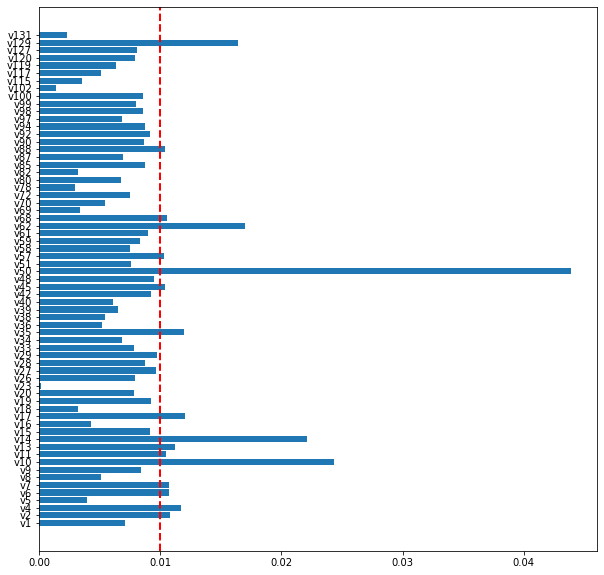

Index(['v2', 'v4', 'v6', 'v7', 'v10', 'v11', 'v13', 'v14', 'v17', 'v35', 'v45',
       'v50', 'v57', 'v62', 'v68', 'v88', 'v129'],
      dtype='object')


In [142]:
#----------------------------------------------------------------#

# mutual information
# 일반적이며 X를 관찰한 후 Y의 부확실성 감소를 측정하는 지표이다. 
# 독립변수와 종속변수간의 단변량 의존성을 측정하게 되고, 값이 작을 수록 독립변수는 종속변수에 대하여 독립적이라 할 수 있고,
# 즉 도움이 안되는 변수라고 판단할 수 있다.
# mutual_info_ 라이브러리를 사용하기 위해서 독립변수에 결측값이 존재하면 안된다.
# Class의 분포가 균일하지 않다면 정보값이 매우 작아 질 수 있어 rescaling을 고려해야 한다.
from sklearn.feature_selection import mutual_info_classif
threshold = 0.01

high_score_feature = []
feature_scores = mutual_info_classif(train_x.fillna(0), train_y, random_state=41)

# mutual information visualizaion

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,1, figsize = (10,10))
pos = numpy.arange(len(feature_scores))
plt.barh(pos, feature_scores)
plt.yticks(pos , train_x.columns)

plt.axvline(x=threshold, color='red', linestyle='--', linewidth = 2)
plt.show()


for score, f_name in zip(feature_scores, train_x.columns):
    # print(f_name, score)
    if score > threshold:
        high_score_feature.append(f_name)

train_x_sel = train_x[high_score_feature]
print(train_x_sel.columns)



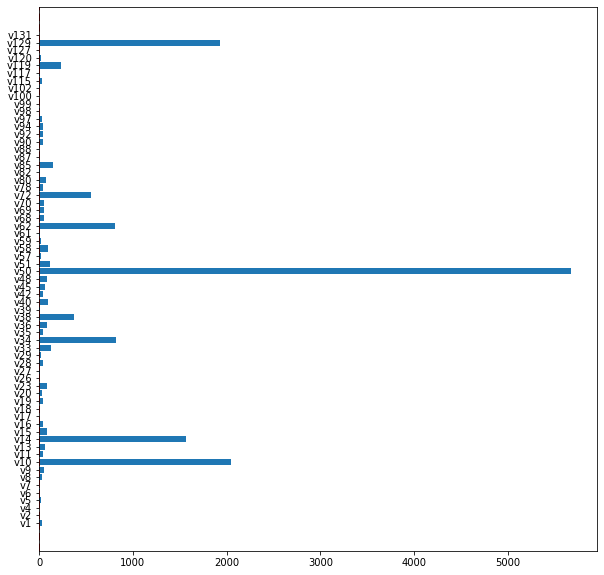

Index(['v131', 'v100', 'v4', 'v2', 'v99', 'v17', 'v88', 'v82', 'v27', 'v26',
       'v39', 'v102', 'v87', 'v127', 'v7', 'v6', 'v98', 'v18', 'v117', 'v61',
       'v59', 'v120', 'v57', 'v5', 'v29', 'v97', 'v115', 'v8', 'v1', 'v20',
       'v11', 'v19', 'v42', 'v35', 'v94', 'v78', 'v16', 'v92', 'v28', 'v90',
       'v69', 'v9', 'v70', 'v68', 'v13', 'v45', 'v80', 'v15', 'v23', 'v36',
       'v48', 'v58', 'v40', 'v51', 'v33', 'v85', 'v119', 'v38', 'v72', 'v62',
       'v34', 'v14', 'v129', 'v10', 'v50'],
      dtype='object')


In [156]:
# ANOVA F-test
# Feature에 대해 분산 분석 F-test를 사용하고, 선형 의존성만을 고려한 Feature Selection
# 일원 분산 분석을 수행, 독립변수 : 연속형 변수 | 종속변수 : 이산형/범주형 변수
# 잘 사용되지 않음

import scipy.stats
from sklearn.feature_selection import f_classif
feature_scores = f_classif(train_x.fillna(0), train_y)[0]
high_score_feature = []


# visualizaion

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,1, figsize = (10,10))
pos = numpy.arange(len(feature_scores))
plt.barh(pos, feature_scores)
plt.yticks(pos , train_x.columns)

plt.axvline(x=threshold, color='red', linestyle='--', linewidth = 2)
plt.show()

for score, f_name in sorted(zip(feature_scores, train_x.columns)):
    #print(f_name, " : ", score)
    if(score > threshold):
        high_score_feature.append(f_name)

train_x_sel = train_x[high_score_feature]
print(train_x_sel.columns)

In [ ]:
# Fisher score
# Fisher Score는 최대 우도 추정(MLE)와 관련이 있습니다. 
# 최대 우도법은 모수적인 데이터 밀도 추정방법으로써 파라미터 θ로 구성된 어떤 확률밀도함수P(x|θ)에서 관측된
# 표본 데이터 집합을 x라 할때, 이 표본들에서 파라미터 θ를 추정하는 방법이다.

# To-DO 
# MLE 와 fisher Score 관계 알고리즘적이해 필요